read and load dataset

Files already downloaded and verified
Files already downloaded and verified
Label: 9
Image shape: torch.Size([3, 32, 32])


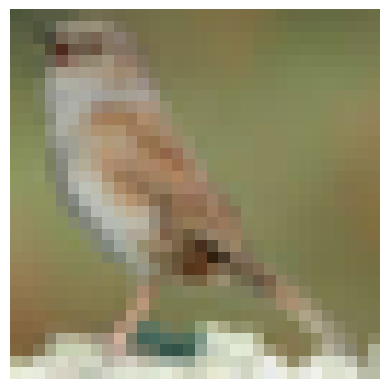

In [ ]:
# @title load data
import torch
import torchvision
from torchvision import transforms

# Parameters
batch_size = 64
lr = 0.001
num_epochs = 20
# Define the transformation
transform = transforms.ToTensor()

# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./Dataset/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./Dataset/', train=False, transform=transform, download=True)

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Example: Display the first image and its label from the training set
image, label = next(iter(train_loader))
print(f"Label: {label[0]}")
print(f"Image shape: {image[0].shape}")

# To display the first image using matplotlib
import matplotlib.pyplot as plt

# Convert the tensor image to a numpy array and transpose it to (H, W, C)
image = image[2].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
train_dataset



Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./Dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
# @title define layer
import torch.nn as nn
class model(nn.Madule):
  def __init__(self):
    super(model,self).__init__()
    self.layer1 = nn.sequentiol(nn.Conv2d(3,32,3,1,2),
                                nn.BatchNorm2d(32),
                                nn.ReLU(),
                                nn.MaxPool2d(2,2),)
    self.layer2 = nn.sequentiol(nn.Conv2d(32,64,3,1,2),
                                nn.BatchNorm2d(64),
                                nn.ReLU(),
                                nn.MaxPool2d(2,2),)
    self.layer1 = nn.sequentiol(nn.Conv2d(64,128,3,1,2),
                                nn.BatchNorm2d(128),
                                nn.ReLU(),
                                nn.MaxPool2d(2,2),)
    self.fc = nn.Linear()



In [ ]:
# @title define layer and forward
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Linear(128 * 5 * 5, 10)  # Adjust the input features based on the final spatial dimensions

    def forward(self, x):
        x = self.layer1(x)
        print(f'After layer1: {x.shape}')
        x = self.layer2(x)
        print(f'After layer2: {x.shape}')
        x = self.layer3(x)
        print(f'After layer3: {x.shape}')
        x = x.view(x.size(0), -1)  # Flatten the tensor
        print(f'After flattening: {x.shape}')
        x = self.fc(x)
        return x

model = CustomCNN()

# Assuming you have already defined train_loader
# For demonstration, let's get a batch from train_loader and pass it through the model
#for imgs, lbls in train_loader:
   # out = model(imgs)
   # break


In [ ]:
import torch

# Define loss function, optimizer, and learning rate scheduler
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

model.train()
num_steps = len(train_loader)


for epoch in range(num_epochs):
    model.train()
    # If condition to update learning rate scheduler
    # if d_loss < 0.2:  # Example condition, you need to define d_loss
    #     lr_sch.step()
    print(f"Learning rate: {lr_sch.get_last_lr()}")  # Corrected to get_last_lr()

    for step, (imgs, lbls) in enumerate(train_loader):
        out = model(imgs)
        loss_val = loss_fn(out, lbls)
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        if (step + 1) % 2 == 0:
            print(f'Train, Epoch [{epoch + 1}/{num_epochs}] Step [{step + 1}/{num_steps}] Loss: {loss_val.item():.4f}')

        if step == 10:  # For debugging, break after 10 steps
            break



# Test phase
model.eval()
corrects = 0
num_steps = len(test_loader)
with torch.no_grad():
    for step, (imgs, lbls) in enumerate(test_loader):
        out = model(imgs)
        predicted = torch.argmax(out, 1)
        corrects += torch.sum(predicted == lbls).item()
        print(f'Step [{step + 1}/{num_steps}] Acc: {100. * corrects / ((step + 1) * batch_size):.4f}')

# Save the model
torch.save(model.state_dict(), 'model.pth')


Learning rate: [0.001]
After layer1: torch.Size([64, 32, 17, 17])
After layer2: torch.Size([64, 64, 9, 9])
After layer3: torch.Size([64, 128, 5, 5])
After flattening: torch.Size([64, 3200])
After layer1: torch.Size([64, 32, 17, 17])
After layer2: torch.Size([64, 64, 9, 9])
After layer3: torch.Size([64, 128, 5, 5])
After flattening: torch.Size([64, 3200])
Train, Epoch [1/20] Step [2/782] Loss: 3.9369
After layer1: torch.Size([64, 32, 17, 17])
After layer2: torch.Size([64, 64, 9, 9])
After layer3: torch.Size([64, 128, 5, 5])
After flattening: torch.Size([64, 3200])
After layer1: torch.Size([64, 32, 17, 17])
After layer2: torch.Size([64, 64, 9, 9])
After layer3: torch.Size([64, 128, 5, 5])
After flattening: torch.Size([64, 3200])
Train, Epoch [1/20] Step [4/782] Loss: 2.9926
After layer1: torch.Size([64, 32, 17, 17])
After layer2: torch.Size([64, 64, 9, 9])
After layer3: torch.Size([64, 128, 5, 5])
After flattening: torch.Size([64, 3200])
After layer1: torch.Size([64, 32, 17, 17])
After l

Files already downloaded and verified
Files already downloaded and verified


Label: 9
Image shape: torch.Size([3, 32, 32])


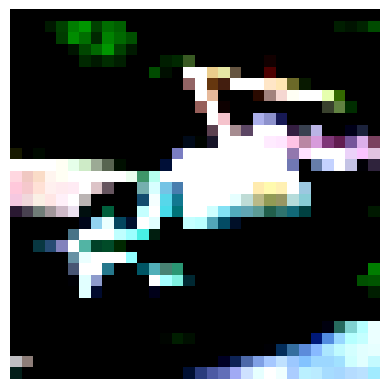

Train, Epoch [1/20] Step [100/782] Loss: 1.9893
Train, Epoch [1/20] Step [200/782] Loss: 1.8010
Train, Epoch [1/20] Step [300/782] Loss: 1.6870
Train, Epoch [1/20] Step [400/782] Loss: 1.6038
Train, Epoch [1/20] Step [500/782] Loss: 1.5422
Train, Epoch [1/20] Step [600/782] Loss: 1.4888
Train, Epoch [1/20] Step [700/782] Loss: 1.4430
Validation, Epoch [1/20] Accuracy: 65.01%
Train, Epoch [2/20] Step [100/782] Loss: 0.9869
Train, Epoch [2/20] Step [200/782] Loss: 0.9727
Train, Epoch [2/20] Step [300/782] Loss: 0.9620
Train, Epoch [2/20] Step [400/782] Loss: 0.9608
Train, Epoch [2/20] Step [500/782] Loss: 0.9531
Train, Epoch [2/20] Step [600/782] Loss: 0.9478
Train, Epoch [2/20] Step [700/782] Loss: 0.9444
Validation, Epoch [2/20] Accuracy: 69.22%
Train, Epoch [3/20] Step [100/782] Loss: 0.8193
Train, Epoch [3/20] Step [200/782] Loss: 0.8114
Train, Epoch [3/20] Step [300/782] Loss: 0.8147
Train, Epoch [3/20] Step [400/782] Loss: 0.8053
Train, Epoch [3/20] Step [500/782] Loss: 0.8015
Trai

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Parameters
batch_size = 64
lr = 0.001
num_epochs = 20

# Data Augmentation and Normalization
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 Dataset
train_dataset = torchvision.datasets.CIFAR10(root='./Dataset/', train=True, transform=transform_train, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./Dataset/', train=False, transform=transform_test, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Display an example image
image, label = next(iter(train_loader))
print(f"Label: {label[0]}")
print(f"Image shape: {image[0].shape}")

image = image[0].numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.axis('off')
plt.show()

# Define the CNN model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Linear(256 * 4 * 4, 10)  # Adjust the input features based on the final spatial dimensions

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x

# Initialize the model, loss function, optimizer, and learning rate scheduler
model = CustomCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

# Training and validation
num_steps = len(train_loader)
model.train()

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    corrects = 0

    for step, (imgs, lbls) in enumerate(train_loader):
        out = model(imgs)
        loss_val = loss_fn(out, lbls)
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        total_loss += loss_val.item()
        _, predicted = torch.max(out.data, 1)
        corrects += (predicted == lbls).sum().item()

        if (step + 1) % 100 == 0:
            print(f'Train, Epoch [{epoch + 1}/{num_epochs}] Step [{step + 1}/{num_steps}] Loss: {total_loss / (step + 1):.4f}')

    lr_sch.step()

    # Validation
    model.eval()
    corrects = 0
    with torch.no_grad():
        for step, (imgs, lbls) in enumerate(test_loader):
            out = model(imgs)
            loss_val = loss_fn(out, lbls)
            _, predicted = torch.max(out.data, 1)
            corrects += (predicted == lbls).sum().item()

    accuracy = 100. * corrects / len(test_dataset)
    print(f'Validation, Epoch [{epoch + 1}/{num_epochs}] Accuracy: {accuracy:.2f}%')

# Test phase
model.eval()
corrects = 0
num_steps = len(test_loader)
with torch.no_grad():
    for step, (imgs, lbls) in enumerate(test_loader):
        out = model(imgs)
        predicted = torch.argmax(out, 1)
        corrects += torch.sum(predicted == lbls).item()
        print(f'Step [{step + 1}/{num_steps}] Acc: {100. * corrects / ((step + 1) * batch_size):.4f}')

# Save the model
torch.save(model.state_dict(), 'model.pth')
